In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_fl = pd.read_csv('data_female.csv', sep=';', encoding='windows 1251')
df_ml = pd.read_csv('data_male.csv', sep=';', encoding='windows 1251')
df = pd.concat([df_fl, df_ml])
df = df.drop(['ID', 'Unnamed: 6'], axis=1)
df = df.drop(0)

In [3]:
print(df)

            Name NumberOfPersons   global_id  Year     Month
1          Мария             252    37750254  2015    январь
2      Анастасия             224    37750255  2015    январь
3           Анна             190    37750256  2015    январь
4        Варвара             190    37750257  2015    январь
5       Виктория             186    37750258  2015    январь
...          ...             ...         ...   ...       ...
10496      Карим               8  2629916630  2023  Сентябрь
10497     Родион               8  2629916631  2023  Сентябрь
10498       Алим               8  2629916632  2023  Сентябрь
10499      Ислам               7  2629916633  2023  Сентябрь
10500    Абубакр               7  2629916634  2023  Сентябрь

[21000 rows x 5 columns]


In [4]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').fillna(0).astype(np.int64)

In [5]:
months = ["январь", "февраль", "март", "апрель",
                      "май", "июнь", "июль", "август",
                      "сентябрь", "октябрь", "ноябрь", "декабрь"]

In [6]:
df['Month'] = df['Month'].apply(lambda s: s.lower())
df['Month'] = df['Month'].apply(lambda mth: months.index(mth))

In [7]:
df['Date'] = df.Month + df.Year * 12
label_transform = lambda labels: [f'{l // 12}-{(l % 12 + 1):02}' for l in labels]

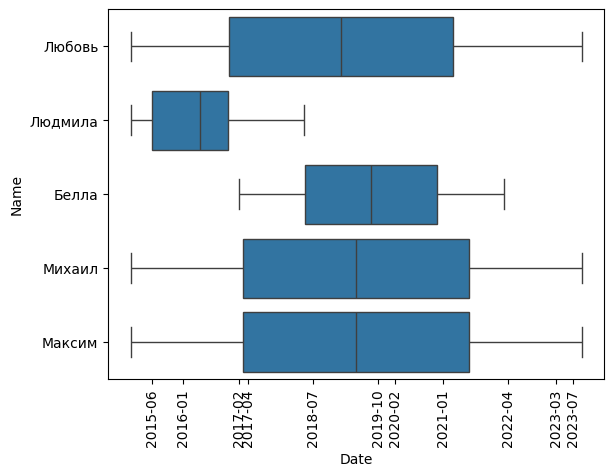

In [8]:
df_a = df[df.Name.isin(['Арабелла', 'Любовь', 'Михаил', 'Людмила', 'Максим', 'Белла'])]

sns.boxplot(df_a, y='Name', x='Date')

plt.xticks(df_a.Date[::30], label_transform(df_a.Date[::30]), rotation=90)

plt.show()

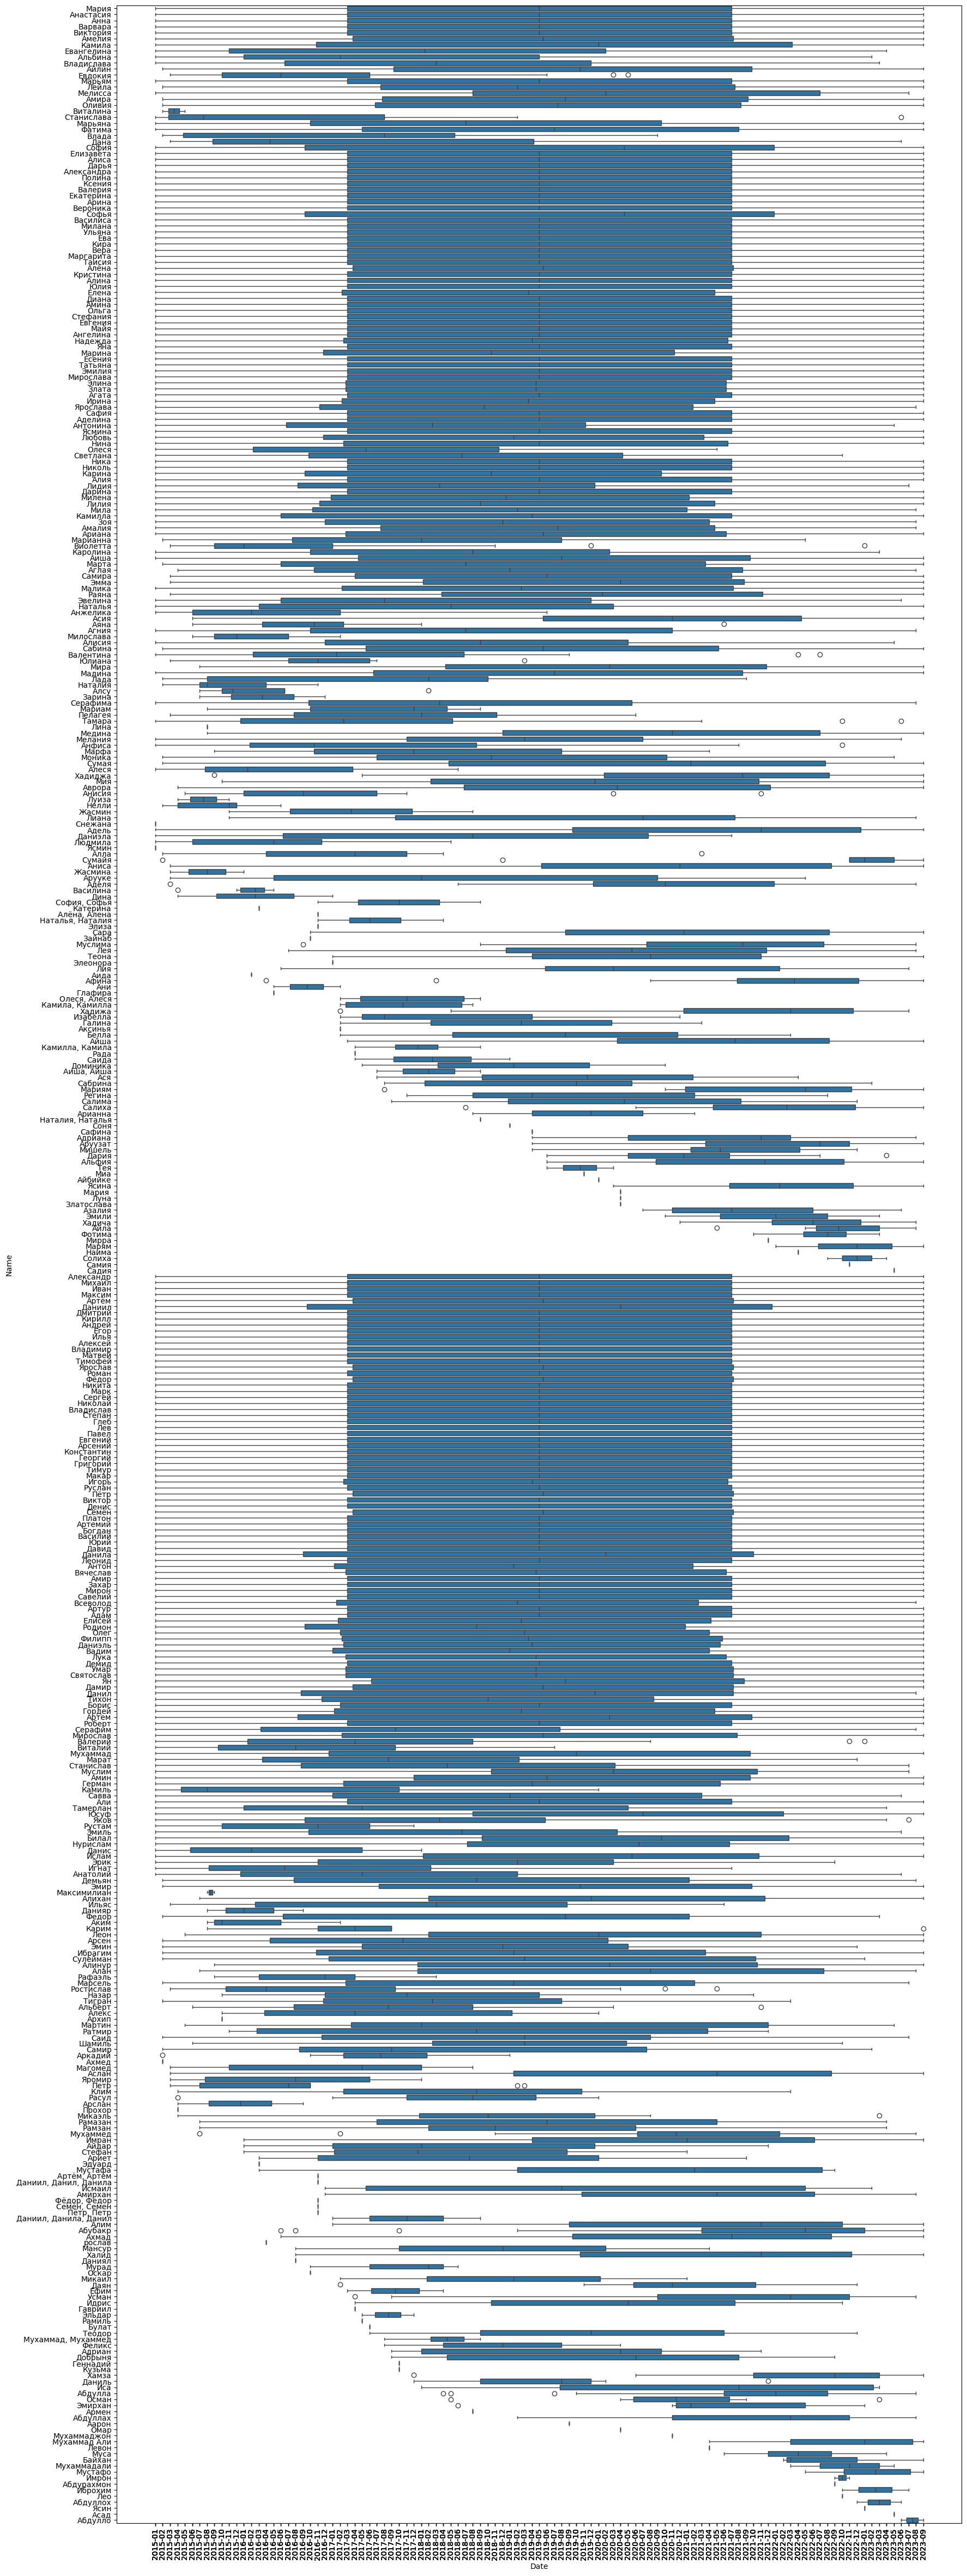

In [9]:
fig, ax = plt.subplots(figsize=(20, 60))
sns.boxplot(df, y='Name', x='Date')
plt.xticks(df.Date[::30], label_transform(df.Date[::30]), rotation=90)
plt.show()